In [13]:
#Imports
import pandas as pd
import sklearn as skl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer

from sklearn.metrics import r2_score, mean_squared_error

data: http://jse.amstat.org/v19n3/decock/DataDocumentation.txt

### Load the data

In [48]:
houses = pd.read_csv('../datasets/train.csv')
houses_test = pd.read_csv('../datasets/test.csv')
pd.set_option('display.max_columns', None)

In [50]:
houses.columns = [col.lower().replace(" ", '_').replace("/", '_')  for col in \
                        houses.columns]
houses_test.columns = [col.lower().replace(" ", '_').replace("/", '_')  \
                       for col in houses_test.columns]

In [51]:
houses.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod_add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

#### missing vals

##### missing vals resources

[how to handle missing values](https://medium.com/analytics-vidhya/how-to-handle-missing-values-cbd03fb79ef8#:~:text=When%20column%20has%20more%20than,%25%20missing%20value%2C%20drop%20it.)

##### missing values analysis

In [16]:
houses.describe()

,id,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,2050.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,1937.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,47.959024,567.728293,1057.987805,1164.488055,329.329108,5.512921,1499.330083,0.427526,0.063446,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1978.707796,1.776585,473.671707,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,165.000901,444.954786,449.410704,396.446923,425.671046,51.068870,500.447829,0.522673,0.251705,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,25.441094,0.764537,215.934561,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.500000,994.500000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,0.000000,811.000000,1318.750000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [17]:
houses.isnull().sum().sort_values(ascending = False)[lambda x:x>0]

pool_qc           2042
misc_feature      1986
alley             1911
fence             1651
fireplace_qu      1000
lot_frontage       330
garage_finish      114
garage_qual        114
garage_yr_blt      114
garage_cond        114
garage_type        113
bsmt_exposure       58
bsmtfin_type_2      56
bsmtfin_type_1      55
bsmt_cond           55
bsmt_qual           55
mas_vnr_area        22
mas_vnr_type        22
bsmt_half_bath       2
bsmt_full_bath       2
garage_area          1
total_bsmt_sf        1
bsmt_unf_sf          1
bsmtfin_sf_2         1
bsmtfin_sf_1         1
garage_cars          1
dtype: int64

###### Column Dropping:

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651

There don't seem to be many pools in Ames (9).  Likewise, only 65 houses have Miscelaneous Features (3.17%), so I believe it is reasonable to drop this feature.  Also, there are 1911 out of 2051 houses without an alley.  I'm going to remove this feature.  There are a significant number of fences (400), so I'll impute "None" for the NA values. It would be difficult to draw conclusions from columns 'Pool QC' and 'Pool Area', as there are only 9 houses with pools. 

Likewise for Misc Feature, Alley, and Fence, these do not strike me as frequent enough and/or important enough to include as a predictive feature.  I will drop all four columns.

I'll drop PID because this feature is reduntant with ID for data identification purposes.  ID I will keep for maintining identification of the data.  

In [18]:
dropped_columns = ['pid','misc_feature','misc_val','alley','pool_qc', 'pool_area']
houses.drop(columns = dropped_columns, axis = 1, inplace = True)
houses_id = houses.pop('id')

In [19]:
houses_test.drop(columns = dropped_columns, axis = 1, inplace = True)
houses_test_id = houses_test.pop('id')

I will make sure that the columns have the correct dtypes.

In [20]:
houses['ms_subclass'] = houses['ms_subclass'].astype('category')

In [21]:
houses.columns

Index(['ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area', 'street',
       'lot_shape', 'land_contour', 'utilities', 'lot_config', 'land_slope',
       'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2',
       'bsmt_unf_sf', 'total_bsmt_sf', 'heating', 'heating_qc', 'central_air',
       'electrical', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf',
       'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath',
       'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual',
       'totrms_abvgrd', 'functional', 'fireplaces', 'fireplace_qu',
       'garage_type', 'garage_yr_blt', 'garage_finish', 'garage_cars',

I will also collect column names for ordinal encoding vs. One-Hot encoding.  

In [22]:
target = ['saleprice']   
 
features_ord = ['lot_shape','utilities','land_slope','overall_qual',\
'overall_cond', 'exter_qual','exter_cond', 'bsmt_qual', 'bsmt_cond', \
'bsmt_exposure','bsmtfin_type_1','bsmtfin_type_2','heating_qc','electrical',\
'kitchen_qual', 'functional', 'fireplace_qu', 'garage_finish', 'garage_qual',
'garage_cond', 'paved_drive', 'fence']

features_nom = ['ms_subclass','ms_zoning','street','land_contour',\
'lot_config','neighborhood','condition_2','bldg_type','house_style', \
'roof_style', 'roof_matl','exterior_1st','exterior_2nd', 'mas_vnr_type',\
'foundation','heating','central_air', 'garage_type', 'misc_val', 'sale_type',]

features_cont = ['lot_frontage','lot_area','mas_vnr_area','bsmtfin_sf_1',\
'bsmtfin_sf_2','bsmt_unf_sf', 'total_bsmt_sf','1st_flr_sf', '2nd_flr_sf', \
'low_qual_fin_sf','gr_liv_area', 'garage_area', 'wood_deck_sf', 'open_porch_sf',\
'enclosed_porch','3ssn_porch', 'screen_porch', ]

features_disc = ['year_built', 'year_remod/add','bsmt_full_bath',\
'bsmt_half_bath', 'full_bath', 'half_bath','bedroom_abvgr', 'kitchen_abvgr',\
'totrms_abvgrd', 'fireplaces', 'garage_yr_blt', 'garage_cars', 'mo_sold', \
'yr_sold',]

features_all = features_ord + features_nom + features_cont + features_disc
len(features_all)

73

```To-do:``` I will make 'month_sold' a nominal variable:

```To-do:``` months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov', \
          'Dec']
houses()


In [23]:
houses.groupby('mo_sold').mean()['saleprice']

mo_sold
1     195126.303797
2     177626.519231
3     174625.779762
4     163901.269231
5     180332.369650
6     182662.798295
7     188571.514851
8     186927.359281
9     188990.761468
10    179334.471545
11    184377.495146
12    182459.615385
Name: saleprice, dtype: float64

In [24]:
pd.set_option('display.max_rows', None)
houses.dtypes

ms_subclass        category
ms_zoning            object
lot_frontage        float64
lot_area              int64
street               object
lot_shape            object
land_contour         object
utilities            object
lot_config           object
land_slope           object
neighborhood         object
condition_1          object
condition_2          object
bldg_type            object
house_style          object
overall_qual          int64
overall_cond          int64
year_built            int64
year_remod/add        int64
roof_style           object
roof_matl            object
exterior_1st         object
exterior_2nd         object
mas_vnr_type         object
mas_vnr_area        float64
exter_qual           object
exter_cond           object
foundation           object
bsmt_qual            object
bsmt_cond            object
bsmt_exposure        object
bsmtfin_type_1       object
bsmtfin_sf_1        float64
bsmtfin_type_2       object
bsmtfin_sf_2        float64
bsmt_unf_sf         

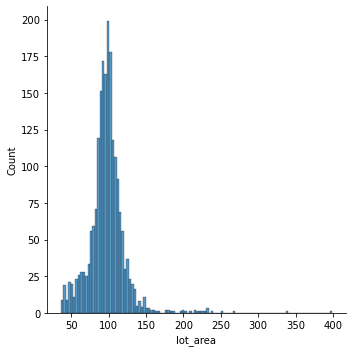

In [25]:
sns.displot(houses['lot_area'].pow(.5))

In [26]:
houses['lot_area'].quantile(np.arange(0,100,5)/100)

0.00     1300.0
0.05     3189.0
0.10     5000.0
0.15     6090.0
0.20     7006.0
0.25     7500.0
0.30     7990.0
0.35     8387.5
0.40     8730.0
0.45     9022.0
0.50     9430.0
0.55     9750.0
0.60    10140.0
0.65    10530.0
0.70    10920.0
0.75    11513.5
0.80    12205.0
0.85    13045.5
0.90    14277.0
0.95    16770.0
Name: lot_area, dtype: float64

In [27]:
houses.corr()

,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,mo_sold,yr_sold,saleprice
lot_frontage,1.000000,0.574024,0.194808,-0.054455,0.109504,0.085052,0.218218,0.214178,0.036740,0.127605,0.356584,0.463900,0.013700,-0.000300,0.383856,0.111441,-0.030858,0.152812,0.035842,0.220414,0.015856,0.362704,0.253456,0.067865,0.297143,0.358457,0.115180,0.184958,-0.003302,0.031855,0.074819,-0.017389,0.009112,0.341842
lot_area,0.574024,1.000000,0.105824,-0.019185,0.036002,0.050771,0.169379,0.215430,0.041717,0.041184,0.277175,0.381593,0.029398,0.001273,0.327427,0.116128,0.029980,0.125601,0.049995,0.139060,-0.013484,0.238724,0.289467,0.004882,0.214954,0.263296,0.155623,0.140864,0.014139,0.019553,0.067714,0.003197,-0.029454,0.296566
overall_qual,0.194808,0.105824,1.000000,-0.082770,0.602964,0.584654,0.438685,0.278742,-0.028199,0.275773,0.548742,0.477136,0.228152,-0.052338,0.566701,0.175171,-0.047318,0.515080,0.274859,0.053373,-0.170964,0.382025,0.388920,0.574553,0.587423,0.563814,0.257081,0.308855,-0.154554,0.031938,0.048752,0.019242,-0.011578,0.800207
overall_cond,-0.054455,-0.019185,-0.082770,1.000000,-0.370988,0.042614,-0.135878,-0.045768,0.047810,-0.130521,-0.158643,-0.150938,0.010912,0.004753,-0.109804,-0.039113,0.100324,-0.219189,-0.093266,-0.009908,-0.095725,-0.093576,-0.006463,-0.331765,-0.168513,-0.137917,0.011034,-0.052266,0.108320,0.026907,0.047359,-0.003144,0.047664,-0.097019
year_built,0.109504,0.036002,0.602964,-0.370988,1.000000,0.629116,0.329741,0.275440,-0.021031,0.136662,0.410254,0.323315,0.022313,-0.159403,0.258838,0.215200,-0.031464,0.480169,0.283207,-0.042149,-0.127162,0.137783,0.168848,0.825316,0.542544,0.487177,0.216339,0.207798,-0.380082,0.016104,-0.037866,-0.007083,-0.003559,0.571849
year_remod/add,0.085052,0.050771,0.584654,0.042614,0.629116,1.000000,0.211443,0.166680,-0.057163,0.160066,0.308545,0.244190,0.159605,-0.066577,0.322407,0.153507,-0.037923,0.471555,0.224106,-0.019748,-0.135926,0.202397,0.138858,0.674024,0.441796,0.398999,0.216271,0.264476,-0.237523,0.040416,-0.041211,0.011568,0.042744,0.550370
mas_vnr_area,0.218218,0.169379,0.438685,-0.135878,0.329741,0.211443,1.000000,0.321807,-0.016756,0.085853,0.408575,0.391349,0.100568,-0.061878,0.387833,0.148049,0.010220,0.240034,0.192687,0.054589,-0.070677,0.273359,0.269104,0.266763,0.361211,0.384718,0.163584,0.163489,-0.107104,0.011161,0.086631,-0.001472,-0.018719,0.512230
bsmtfin_sf_1,0.214178,0.215430,0.278742,-0.045768,0.275440,0.166680,0.321807,1.000000,-0.050249,-0.473488,0.538999,0.462198,-0.168015,-0.078362,0.215295,0.645432,0.077500,0.074982,-0.006742,-0.120760,-0.096397,0.055973,0.298506,0.188605,0.260676,0.331611,0.214274,0.140286,-0.076963,0.047719,0.093226,-0.010534,0.037978,0.423519
bsmtfin_sf_2,0.036740,0.041717,-0.028199,0.047810,-0.021031,-0.057163,-0.016756,-0.050249,1.000000,-0.231330,0.086545,0.095675,-0.087505,-0.002764,0.001083,0.157008,0.093908,-0.074144,-0.016473,-0.043294,-0.036415,-0.047434,0.067976,-0.062510,-0.002129,0.013190,0.105836,-0.004382,0.004540,-0.024225,0.096405,-0.013945,-0.000013,0.016255
bsmt_unf_sf,0.127605,0.041184,0.275773,-0.130521,0.136662,0.160066,0.085853,-0.473488,-0.231330,1.000000,0.419238,0.302299,-0.012928,0.059575,0.234618,-0.403082,-0.109729,0.278633,-0.042559,0.190827,0.062917,0.256080,0.001821,0.177751,0.167905,0.145080,-0.034438,0.116019,-0.010847,0.020409,-0.055558,0.020043,-0.043683,0.190210


<AxesSubplot:>

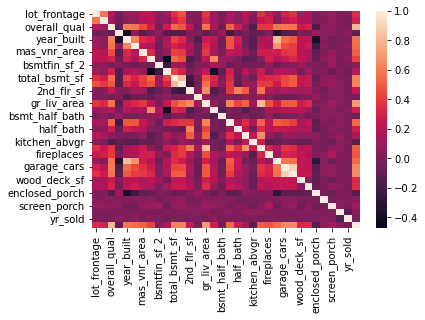

In [28]:
sns.heatmap(houses.corr())

<AxesSubplot:xlabel='1st_flr_sf', ylabel='saleprice'>

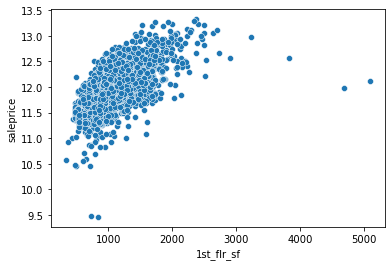

In [29]:
sns.scatterplot(x = houses["1st_flr_sf"], y = np.log(houses['saleprice']))

In [41]:
houses['saleprice']

0       130500
1       220000
2       109000
3       174000
4       138500
5       190000
6       140000
7       142000
8       112500
9       135000
10       85400
11      183600
12      131000
13      200000
14      193000
15      173500
16       98000
17      139000
18      143500
19      215200
20      129000
21      278000
22      344133
23      185000
24      145000
25      187500
26      138500
27      198000
28      119600
29      122900
30      278000
31      230000
32      270000
33      125000
34      297000
35      113500
36      127000
37      190000
38      175500
39      146000
40      147500
41      465000
42      165500
43      131500
44      129500
45      257076
46      117000
47      149000
48      128000
49      155000
50      166000
51      135000
52      250000
53       76000
54      155000
55      158000
56      149500
57      121000
58      136000
59      173000
60      290000
61      303477
62      270000
63      122250
64      153000
65      147000
66      14

In [57]:
def create_scatterplots(df, target, target_name):
    for col in df.columns:
        p = sns.scatterplot(x = houses[col], y = target)
        p.set(title = f'{target} by {col}')
        plt.savefig(f'../plots/scatterplots/{target_name}_{col}.png')

In [64]:
cont_ftrs = houses.select_dtypes(exclude = [object])
for col in cont_ftrs.columns:
    print (col)

id
pid
ms_subclass
lot_frontage
lot_area
overall_qual
overall_cond
year_built
year_remod_add
mas_vnr_area
bsmtfin_sf_1
bsmtfin_sf_2
bsmt_unf_sf
total_bsmt_sf
1st_flr_sf
2nd_flr_sf
low_qual_fin_sf
gr_liv_area
bsmt_full_bath
bsmt_half_bath
full_bath
half_bath
bedroom_abvgr
kitchen_abvgr
totrms_abvgrd
fireplaces
garage_yr_blt
garage_cars
garage_area
wood_deck_sf
open_porch_sf
enclosed_porch
3ssn_porch
screen_porch
pool_area
misc_val
mo_sold
yr_sold
saleprice


KeyboardInterrupt: 

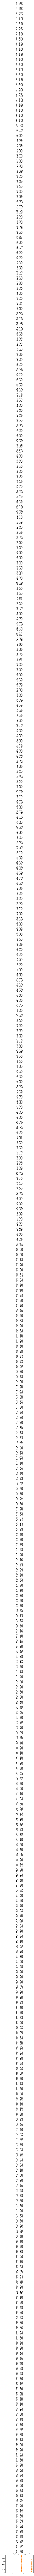

In [65]:
cont_ftrs = houses.select_dtypes(exclude = [object])
create_scatterplots(cont_ftrs, houses['saleprice'], 'saleprice')

In [31]:
def create_hist(df):
    for col in df.columns:
        p = sPlot(df.col, )

In [32]:
def create_barplots(df,target):
    for col in df.columns:
        sns.barplot(x = df[col], y = target)

In [54]:
def create_graphs(df, target):
    target_col = df[target]
    cont_ftrs = df.select_dtypes(exclude = [object])
    create_scatterplots(cont_ftrs, target_col, target)
    cat_ftrs = df.select_dtypes(include = [object])
    df[target] = target_col

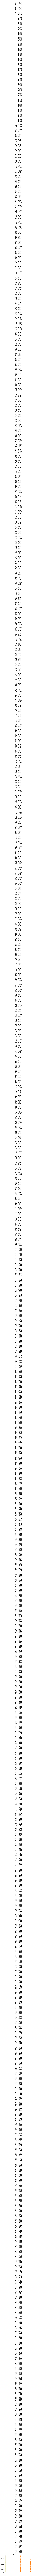

In [55]:
create_graphs(houses,'saleprice')

In [8]:
houses._get_numeric_data()

,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,misc_val,mo_sold,yr_sold,saleprice
0,60,NaN,13517,6,8,1976,2005,289.0,533.0,0.0,192.0,725.0,725,754,0,1479,0.0,0.0,2,1,3,1,6,0,1976.0,2.0,475.0,0,44,0,0,0,0,3,2010,130500
1,60,43.0,11492,7,5,1996,1997,132.0,637.0,0.0,276.0,913.0,913,1209,0,2122,1.0,0.0,2,1,4,1,8,1,1997.0,2.0,559.0,0,74,0,0,0,0,4,2009,220000
2,20,68.0,7922,5,7,1953,2007,0.0,731.0,0.0,326.0,1057.0,1057,0,0,1057,1.0,0.0,1,0,3,1,5,0,1953.0,1.0,246.0,0,52,0,0,0,0,1,2010,109000
3,60,73.0,9802,5,5,2006,2007,0.0,0.0,0.0,384.0,384.0,744,700,0,1444,0.0,0.0,2,1,3,1,7,0,2007.0,2.0,400.0,100,0,0,0,0,0,4,2010,174000
4,50,82.0,14235,6,8,1900,1993,0.0,0.0,0.0,676.0,676.0,831,614,0,1445,0.0,0.0,2,0,3,1,6,0,1957.0,2.0,484.0,0,59,0,0,0,0,3,2010,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,20,79.0,11449,8,5,2007,2007,0.0,1011.0,0.0,873.0,1884.0,1728,0,0,1728,1.0,0.0,2,0,3,1,7,1,2007.0,2.0,520.0,0,276,0,0,0,0,1,2008,298751
2047,30,NaN,12342,4,5,1940,1950,0.0,262.0,0.0,599.0,861.0,861,0,0,861,0.0,0.0,1,0,1,1,4,0,1961.0,2.0,539.0,158,0,0,0,0,0,3,2009,82500
2048,50,57.0,7558,6,6,1928,1950,0.0,0.0,0.0,896.0,896.0,1172,741,0,1913,0.0,0.0,1,1,3,1,9,1,1929.0,2.0,342.0,0,0,0,0,0,0,3,2009,177000
2049,20,80.0,10400,4,5,1956,1956,0.0,155.0,750.0,295.0,1200.0,1200,0,0,1200,1.0,0.0,1,0,3,1,6,2,1956.0,1.0,294.0,0,189,140,0,0,0,11,2009,144000


For some columns that have NA values, the data dictionary indicates that the feature does not exist for the observation, as opposed to indicating that there was not any record.  The columns with na values that indicate the feature is not present for a given observation include:

Fence, FireplaceQu (and 'Fireplaces' ?), 

Garage Cond, Garage Qual, ('Garage Area' ?), Garage Cars, Garage Finish, Garage Yr Blt, Garage Type
Note: there is one fewer Garage Type NAs than there are NA's for the other garage features.  I need to investigate further.

Bsmt features are also asymetrically missing values, which needs to be investigated.  

Mas Vnr does not rely on NA's but instead has 'None' as a value to indicate if a feature is missing.  Imputing with the mode may be the best option here.



There are a significant number of fireplaces and Na values for Fireplace Qu indicate no fireplace, so I will replace the missing values with ```'None'``` .

Only 65 houses with misc features.  Shed is the most common of these with 56, but the median sale price is not much different (163,000.0 with no shed vs 153,750.0 with a shed)

In [9]:
houses.isnull().sum().quantile([x/100 for x in range(90,100)]).values[0]

91.00000000000047

In [10]:
# pct = 50
# houses.isnull().sum(
# .quantile([(100-x)/100 for x in range(100-pct,100)])

In [11]:
# def pth_percentile_na(dataframe, pct = 10):
#     thresh = houses.isnull().sum().quantile(
#         [(100-x)/100 for x in range(100-pct,100)]).values[0]
#     return [f'{col}: {houses[col].isnull().sum()}' for col in houses.columns if houses[col].\
#      isnull().sum() > thresh]
# pth_percentile_na(houses, 20)

I believe that in accordance with the format for other columns, the missing values for lot frontage likely indicate that the lot has no frontage.  This assumption is supported by the observation that the minimum recorded frontage is greater than zero. I will impute zeros in place of the NAs.

In [12]:
houses.isna().sum().value_counts()

0       52
1        6
114      4
55       3
22       2
2        2
330      1
58       1
56       1
1000     1
113      1
1651     1
dtype: int64

In [13]:
houses.dtypes

ms_subclass       int64
ms_zoning        object
lot_frontage    float64
lot_area          int64
street           object
                 ...   
misc_val          int64
mo_sold           int64
yr_sold           int64
sale_type        object
saleprice         int64
Length: 75, dtype: object

In [14]:
#https://stackoverflow.com/questions/25039626/how-do-i-find-numeric-columns-in-
#pandas
#https://stackoverflow.com/questions/21271581/selecting-pandas-columns-by-dtype

houses_numeric = houses.select_dtypes(exclude=[object])
si = SimpleImputer(strategy = 'constant')

si.fit(houses_numeric)
houses_numeric_imputed = si.transform(houses_numeric)
houses_numeric = pd.DataFrame(houses_numeric_imputed, columns = houses_numeric.\
                              columns)

houses_obj = houses.select_dtypes(include=[object])
si = SimpleImputer(strategy = 'constant', fill_value='None')

si.fit(houses_obj)
houses_obj_imputed = si.transform(houses_obj)
houses_obj = pd.DataFrame(houses_obj_imputed, columns = houses_obj.\
                              columns)
houses_imp = houses_numeric.join(houses_obj)

houses_imp.describe()

,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,misc_val,mo_sold,yr_sold,saleprice
count,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,57.008776,57.944417,10065.208191,6.112140,5.562165,1971.708922,1984.190151,98.626524,442.084837,47.935641,567.451487,1057.471965,1164.488055,329.329108,5.512921,1499.330083,0.427109,0.063384,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1868.725987,1.775719,473.440761,93.833740,47.556802,22.571916,2.591419,16.511458,51.574354,6.219893,2007.775719,181469.701609
std,42.824223,33.137332,6742.488909,1.426271,1.104497,30.177889,21.036250,174.324690,461.195041,164.964052,445.022846,449.908003,396.446923,425.671046,51.068870,500.447829,0.522589,0.251590,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,454.133654,0.765357,216.135102,128.549416,66.747241,59.845110,25.229615,57.374204,573.393985,2.744736,1.312014,79258.659352
min,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,20.000000,43.500000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1957.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,50.000000,63.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.000000,994.000000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,70.000000,78.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,159.000000,733.500000,0.000000,811.000000,1318.500000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,17000.000000,12.000000,2010.000000,611657.000000


In [15]:
# imputing test data
houses_test_numeric = houses_test.select_dtypes(exclude=[object])
si = SimpleImputer(strategy = 'constant')
si.fit(houses_test_numeric)
houses_test_numeric_imputed = si.transform(houses_test_numeric)
houses_test_numeric = pd.DataFrame(houses_test_numeric_imputed, columns = houses_test_numeric.\
                              columns)

houses_test_obj = houses_test.select_dtypes(include=[object])
si = SimpleImputer(strategy = 'constant', fill_value='None')

si.fit(houses_test_obj)
houses_test_obj_imputed = si.transform(houses_test_obj)
houses_test_obj = pd.DataFrame(houses_test_obj_imputed, columns = houses_test_obj.\
                              columns)
houses_test_imp = houses_test_numeric.join(houses_test_obj)

houses_test_imp.describe()

,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,misc_val,mo_sold,yr_sold
count,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000
mean,58.268793,56.872437,10307.033030,6.050114,5.566059,1970.492027,1984.417995,106.115034,441.328018,53.896355,539.133257,1034.357631,1145.787016,348.398633,2.728929,1496.914579,0.439636,0.055809,1.539863,0.398633,2.879271,1.047836,6.454442,0.618451,1875.445330,1.742597,470.362187,93.430524,47.070615,24.064920,2.597950,14.830296,48.498861,6.202733,2007.825740
std,42.235407,34.269502,10002.674602,1.369065,1.128903,30.395895,20.450725,187.086530,438.457329,178.632355,426.172161,413.446291,375.264111,432.985566,32.572548,506.468967,0.529948,0.229683,0.559060,0.505927,0.830712,0.223966,1.596632,0.669571,436.866917,0.750391,212.734075,121.181702,68.180939,73.249463,24.962482,53.003794,550.169317,2.642498,1.327861
min,20.000000,0.000000,1477.000000,2.000000,1.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,40.000000,7297.250000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,216.000000,789.000000,864.000000,0.000000,0.000000,1114.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1957.000000,1.000000,322.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,60.000000,9446.000000,6.000000,5.000000,1972.000000,1992.000000,0.000000,373.000000,0.000000,452.000000,975.000000,1063.000000,0.000000,0.000000,1436.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1976.500000,2.000000,473.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,78.000000,11589.000000,7.000000,6.000000,1999.750000,2003.000000,171.750000,734.750000,0.000000,780.000000,1247.000000,1358.000000,720.000000,0.000000,1779.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2000.000000,2.000000,576.000000,170.750000,69.750000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,182.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1378.000000,2288.000000,1526.000000,2046.000000,2630.000000,2674.000000,2065.000000,481.000000,4476.000000,2.000000,1.000000,4.000000,2.000000,6.000000,3.000000,12.000000,3.000000,2010.000000,4.000000,1488.000000,690.000000,742.000000,1012.000000,360.000000,576.000000,15500.000000,12.000000,2010.000000


In [16]:
def zero_counts(dataframe):
    zero_counts_dict = {col:dataframe.loc[dataframe[col]==0,col].count() \
               for col in dataframe.columns}
    zero_counts_df = pd.DataFrame.from_dict(data = zero_counts_dict, \
                                            orient = 'index',\
                                            columns = ['zero_counts'])
    zero_counts_df_sorted = zero_counts_df.sort_values(by = 'zero_counts', \
                                                       ascending = False)
    return zero_counts_df_sorted.loc[zero_counts_df_sorted['zero_counts']>0,:]

zero_counts(houses_imp)


,zero_counts
3ssn_porch,2025
low_qual_fin_sf,2018
misc_val,1986
bsmt_half_bath,1925
screen_porch,1870
bsmtfin_sf_2,1804
enclosed_porch,1724
half_bath,1308
mas_vnr_area,1238
bsmt_full_bath,1202


In [17]:
# https://stackoverflow.com/questions/1007481/how-to-replace-whitespaces-with-\
# underscore
# https://www.geeksforgeeks.org/python-convert-two-lists-into-a-dictionary/

# rename_dict = dict(map(lambda i,j : (i,j) , houses_imp.columns,[col.replace(' ','_') for col in houses_imp.columns]))

# houses_imp.columns

In [18]:
import numpy as np

In [19]:
def ft_price_sd(df,features,target):
    target_sd_by_feature =  {feat:np.std(df.groupby([feat])[target].mean().values)\
            for feat in features}
    return pd.DataFrame.from_dict(target_sd_by_feature, orient='index', columns\
            = ['target_sd']).sort_values(by = 'target_sd', ascending = False)

cat_price_sd = ft_price_sd(houses_imp, houses_obj.columns, 'saleprice')


In [20]:
cat_price_sd

,target_sd
condition_2,112416.338996
exter_qual,107679.802091
kitchen_qual,89597.529503
bsmt_qual,83220.946312
garage_qual,72754.521542
exter_cond,66754.802867
fireplace_qu,66203.400248
neighborhood,65776.772939
ms_zoning,61551.176103
roof_matl,61035.047243


[plotting ref1](https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot)
[plotting ref2](https://www.reddit.com/r/learnpython/comments/3cjnpg/seaborn_xaxis_as_index/)

[Text(0, 0.5, 'Categorical Feature'), Text(0.5, 0, 'Price Standard Deviation')]

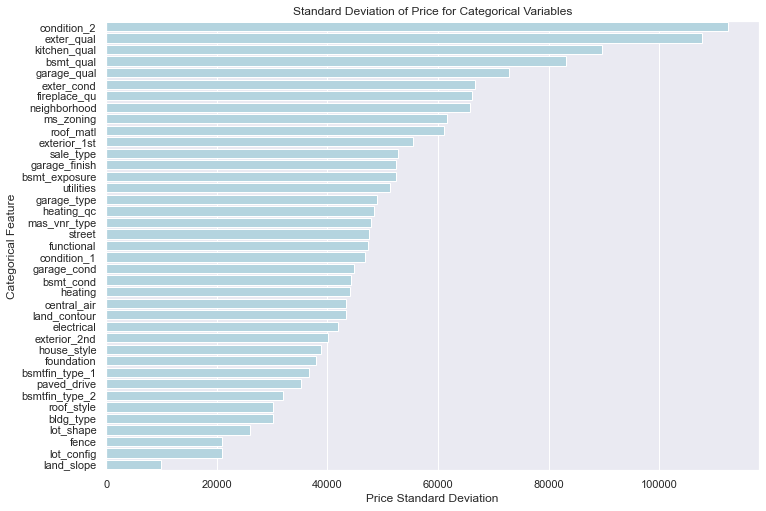

In [21]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

p1 = sns.barplot(data = cat_price_sd.reset_index(), x = 'target_sd', y = 'index', \
            color = 'lightblue')
p1.set(title = 'Standard Deviation of Price for Categorical Variables')
p1.set(ylabel = 'Categorical Feature', xlabel = 'Price Standard Deviation')


[savefig](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html)

In [27]:
picture1 = p1.get_figure()

plt.savefig('sd_feat')

<Figure size 842.4x595.44 with 0 Axes>

In [ ]:
houses_imp.groupby('condition_2').mean()['saleprice']

houses_imp['condition_2'].hist().set(title='Condition 2', xlabel='Category', \
                                     ylabel = 'Counts',)
houses_imp['condition_2'].value_counts()

Condition 2 (Nominal): Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	

In [ ]:
houses

In [ ]:
X = houses_imp.drop(columns = ['saleprice'])
y = houses_imp['saleprice']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size = .25,
    random_state = 3
)

In [ ]:
ohe = OneHotEncoder(
    drop = 'if_binary',
    handle_unknown = 'ignore',
    sparse = False
)

In [ ]:
ctx = ColumnTransformer(
    transformers = [
        #('alias_first', actual_transformer, list_of_cols_to_apply_to)
        ('one_hot', ohe, houses.select_dtypes(include = ['object']).columns)
    ], remainder = 'passthrough', #don't drop the others
    verbose_feature_names_out = False
)

In [ ]:
#transform train
ctx.fit(X_train)
X_train_enc = ctx.transform(X_train)

#transform test
X_val_enc = ctx.transform(X_val)

#recreate dataframes
X_train_enc = pd.DataFrame(X_train_enc, columns = ctx.get_feature_names_out())
X_val_enc = pd.DataFrame(X_val_enc, columns = ctx.get_feature_names_out())

X_train_enc.shape, X_val_enc.shape


In [ ]:
ss = StandardScaler()
Xs_train = ss.fit_transform(X_train_enc)
Xs_train = pd.DataFrame(Xs_train, columns = ss.get_feature_names_out())
Xs_val = pd.DataFrame(ss.transform(X_val_enc), columns = ss.get_feature_names_out())

In [ ]:
lr = LinearRegression()
lr.fit(Xs_train, y_train)
lr.score(X_train_enc, y_train), lr.score(X_val_enc, y_val)

The baseline Linear regression model massively overfits the data.

In [ ]:
linear_preds = lr.predict(Xs_val)

[RMSE formula](https://stackoverflow.com/questions/17197492/is-there-a-library-function-for-root-mean-square-error-rmse-in-python)

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_val, linear_preds, squared=False)

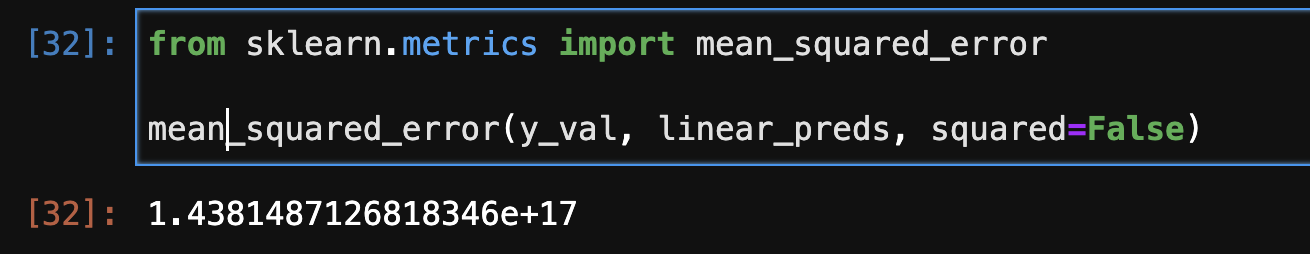The RMSE for the standard, unregularized linear regression is significantly worse than baseline.  It comes out to $379,229,312.25



In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

Baseline Model will predict the y validation based on the average of the y train.

In [ ]:
pred_b = y_train.mean()

round((sum((y_val - pred_b).pow(2))/len(y_val))**.5,2)

The baseline rmse for the validation set is $79,420.42

In [ ]:
lr = LinearRegression()
lr.fit(Xs_train, y_train)
lr.score(Xs_train, y_train), lr.score(Xs_val, y_val)

In [ ]:
lr.predict(Xs_train)

In [ ]:
en = ElasticNetCV(l1_ratio=np.arange(.9,1,.001))


In [ ]:
en.fit(Xs_train, y_train)
en.score(Xs_val,y_val)
best_alpha, best_l1_ratio = en.alpha_, en.l1_ratio_
best_alpha, best_l1_ratio, en.score(Xs_val,y_val), en.score(Xs_train,y_train)


After adjusting the l1_ratio for ElasticNet, the best l1 ratio approaches 1 indicating that the lasso is the best model.  I will use the lasso moving forward.

In [ ]:
en.score(Xs_train, y_train), en.score(Xs_val, y_val)

In [ ]:
best_alpha 

In [ ]:
en.fit(pd.concat([Xs_train,Xs_val]),pd.concat([y_train,y_val]))
en.alpha_

In [ ]:
en.alpha_, en.l1_ratio_

In [ ]:
{feature: coef for coef, feature in zip(en.coef_,en.feature_names_in_)}

In [ ]:
houses_test_imp_enc = ctx.transform(houses_test_imp)
houses_test_imp_enc_ss = pd.DataFrame(ss.transform(houses_test_imp_enc), columns = ss.get_feature_names_out())

In [ ]:
en.alpha_

en_preds2 = en.predict(houses_test_imp_enc_ss)

en_preds2 = pd.DataFrame(en_preds2,columns = ['SalePrice'])

en_preds2.insert(loc = 0, column= 'Id', value = houses_test_id)

en_preds2.to_csv('./en_2_simple.csv', index = False)

In [ ]:
en